# Lecture 6: File handling and Web scrapping

In this lecture we take a closer look on two important fundamental skills for doing data science. The first one is on how to handle files in Python. The second one is how to extract information from publicly available online websites. In the discussions, we will get to familiarise with a few of Python modules which are useful to undertake the two different types of tasks specified above. As usual, there are many alternative modules available that we can use. As you become more familiar with the modules used in this lecture, you should be ready to independently explore some of these alternative tools. 

## Working with files

### Opening text files for input and output

Let's say we have a text file named 'tomsawyer.txt' that we want to read as an input. One way to do it is to use the open() function as shown below.

In [3]:
# opening a text file with a 'read' mode 
myfile = open(file='tomsawyer.txt', mode='r')

# then we can do whatever we want with this file, we can read its content and print it, etc.)
print(myfile.read())

# after we are done with the file, we need to close it to free it from the memory and allow other to open it
myfile.close()


A modern day warrior
Mean, mean stride
Today's Tom Sawyer
Mean, mean pride

Though his mind is not for rent
Don't put him down as arrogant
His reserve, a quiet defense
Riding out the day's events
The river

What you say about his company
Is what you say about society
Catch the mist, catch the myth
Catch the mystery, catch the drift

The world is, the world is
Love and life are deep
Maybe as his skies are wide

Today's Tom Sawyer
He gets high on you
And the space he invades
He gets by on you

No his mind is not for rent
To any god or government
Always hopeful, yet discontent
He knows changes aren't permanent
But change is

What you say about his company
Is what you say about society
Catch the witness, catch the wit
Catch the spirit, catch the spit

The world is, the world is
Love and life are deep
Maybe as his eyes are wide
Exit the warrior
Today's Tom Sawyer
He gets high on you
And the energy you trade
He gets right on to the friction of the day


While the separate `open()` file followed by `.close` at the end works, it is often recommended to use the `with open() as` construct instead. This construct frees us from the need to issue a file `.close()` statement at then end of our program. Most importantly, it will also close the file when, say due to midprogram crash, the execution of our Python codes does not get to the end.<br>

The above example can be rewritten as shown below, where we also show that `string` is the object type returned by `.read` and therefore we can slice it to only extract a portion of the content of the file. 

In [13]:
# opening a text file with a 'read' mode using `with open() as` 
with open(file='tomsawyer.txt', mode='r') as myfile:

    # then we can do whatever we want with this file
    
    # read the content of the file and store it in mytext object
    mytext = myfile.read()

    # notice that the content of myfile is just a (long) string object
    print(type(mytext))

    # print the first 8 characters of mytext
    print(mytext[:9])


<class 'str'>
A modern 
<class 'list'>
['A modern day warrior\n', 'Mean, mean stride\n', "Today's Tom Sawyer\n", 'Mean, mean pride\n', '\n', 'Though his mind is not for rent\n', "Don't put him down as arrogant\n", 'His reserve, a quiet defense\n', "Riding out the day's events\n", 'The river\n', '\n', 'What you say about his company\n', 'Is what you say about society\n', 'Catch the mist, catch the myth\n', 'Catch the mystery, catch the drift\n', '\n', 'The world is, the world is\n', 'Love and life are deep\n', 'Maybe as his skies are wide\n', '\n', "Today's Tom Sawyer\n", 'He gets high on you\n', 'And the space he invades\n', 'He gets by on you\n', '\n', 'No his mind is not for rent\n', 'To any god or government\n', 'Always hopeful, yet discontent\n', "He knows changes aren't permanent\n", 'But change is\n', '\n', 'What you say about his company\n', 'Is what you say about society\n', 'Catch the witness, catch the wit\n', 'Catch the spirit, catch the spit\n', '\n', 'The world is, the wor

The next example demonstrate the method `.readlines()` which allows us to read a text file as a list of lines in the text file as opposed to reading it as a single long string using the `.read()` method.

In [18]:
# read the input text file
with open(file='tomsawyer.txt', mode='r') as myfile:
    
    # read myfile content's as lines
    mytextlines = myfile.readlines()

    # the object type returned by .readlines() is a list of string lines
    print(type(mytextlines))

    # print the whole list
    print(mytextlines)

    # print one line at a time
    i = 1
    for line in mytextlines:
        # before printing strip the new line character '\n'
        print(f"Line {i}, {line.strip()}")
        i+=1

    # The above for loop works but it is not Pythonic when we used a separate i index for the line number
    # The more Pythonic alternative is to use `enumerate()` when we define the for loop as below
    for i, line in enumerate(mytextlines):
        # before printing strip the new line character '\n'
        print(f"Line {i+1}, {line.strip()}")



<class 'list'>
['A modern day warrior\n', 'Mean, mean stride\n', "Today's Tom Sawyer\n", 'Mean, mean pride\n', '\n', 'Though his mind is not for rent\n', "Don't put him down as arrogant\n", 'His reserve, a quiet defense\n', "Riding out the day's events\n", 'The river\n', '\n', 'What you say about his company\n', 'Is what you say about society\n', 'Catch the mist, catch the myth\n', 'Catch the mystery, catch the drift\n', '\n', 'The world is, the world is\n', 'Love and life are deep\n', 'Maybe as his skies are wide\n', '\n', "Today's Tom Sawyer\n", 'He gets high on you\n', 'And the space he invades\n', 'He gets by on you\n', '\n', 'No his mind is not for rent\n', 'To any god or government\n', 'Always hopeful, yet discontent\n', "He knows changes aren't permanent\n", 'But change is\n', '\n', 'What you say about his company\n', 'Is what you say about society\n', 'Catch the witness, catch the wit\n', 'Catch the spirit, catch the spit\n', '\n', 'The world is, the world is\n', 'Love and life

Similarly, we can open a file using the `with open() as` construct for output instead.

In [19]:
#To open and write text to a file, we need to pass in “w” as an argument for the `write` mode
with open('myoutputfile.txt', 'w') as f:
   mytext = "INF80054 Lecture 6: Just a meaningless text to write to a file."
   f.write(mytext)

# the file "myoutputfile.txt" will be created in your current working folder 

### Redirecting print() statement to a file

Often, we want to report the outputs of our Python codes produced by the `print()` statement to an external file instead of to our screen/console. There are several ways of redirecting `print()` to a file as shown by the following examples. In the first example, we redirect print() to file instead of to screen by reassignin `stdout` which is a property defined within Python built-in module `sys`. Thus, we need to first `import sys` and then set `sys.stdout = <file_handle>`. When we are done with redirecting, we need to set `sys.stdout` to its original setting. This is why before we reassign stdout to a file handle we save the original setting with the statement (`original_stdout = sys.stdout`).

In [20]:
# Redirect print() to file instead of to screen by reassignin stdout

import sys

# saving the current setting of stdout
original_stdout = sys.stdout

with open('mylogfile.txt', 'w') as f1:

    # assigne stdout to the file handle f1
    sys.stdout = f1   
    print("First print to file")   
    for i in range(5):
        print('i = ', i)

    # reassigne stdout to its original setting
    sys.stdout = original_stdout
    print("Now print to screen")
    for i in range(5):
        print('i = ', i)

# a new file called "mylogfile.txt" will be created in your current working folder

Now print to screen
i =  0
i =  1
i =  2
i =  3
i =  4


In the second approach, we use a context manager, which requires a Python interpreter version of 3.4 or higher. The benefit of this approach is we do not have to manually reset the print() standard output after we are done with the redirection. To use the context manager, we simply need to import `redirect_stdout` from `contextlib`. Then, similar to the `with open() as` construct when we want to work with an external input or output file, we use the `with redirect_stdout(<file_handle>)`.

In [21]:
#a second way to redirect print() by using the context manager (>= Python 3.4)
from contextlib import redirect_stdout

# let's append to mylogfile (using mode='a')
with open('mylogfile.txt', 'a') as f2:
    with redirect_stdout(f2):
        print("Appending to mylogfile.txt")
        for i in range(5):
            print('i = ', i)
    print("Now printing to screen")
    for i in range(5):
        print('i = ', i)

# the file "mylogfile.txt" created by the previous example will now be appended with new content produced in this example

Now printing to screen
i =  0
i =  1
i =  2
i =  3
i =  4


Finally, we can redirect `print()` output by specifying the `file=<file_handle>` keyword argument in the print() method itself. The disadvantage of this approach is that we have to specify the `file=` keyword argument in every `print(<content_to_print>, file=<file_handle>`) statement that we want the print() output redirected.

In [22]:
# printing to a new log file. note: we open the new logfile with 'append' mode. If the file does not exist, it will be created.
with open('mynewlogfile.txt', 'a') as f3:
    print("Appending to mynewlogfile.txt")
    for i in range(5):
        # print but to a file
        print('i = ', i, file=f3)
    print("Now printing to screen")
    for i in range(5):
        print('i = ', i)

# a new file 'mynewlogfile.txt' will be created if the above codes were run for the first time; otherwise an existing file of the given name will be appended.

Appending to mynewlogfile.txt
Now printing to screen
i =  0
i =  1
i =  2
i =  3
i =  4


### The `os` module

The [os](https://docs.python.org/3/library/os.html) module provides miscellaneous interfaces to the operating system including, for examples:

- `os.listdir(<path>)`: returns a list of all files and folders in a directory specified by `<path>`
- `os.scandir(<path>)`: returns an iterator of all the objects (including file attribute information) in a directory specified by `<path>` 
- `os.path.isfile(<path>)`: returns True if the specified `<path>` is an existing file.
- `pathlib.Path.iterdir()`:	returns an iterator of all the objects in a directory specified by `<path>` (including file attribute information)

In the following example, all files in the specified folder will be listed and saved to text file "anaconda3filelist.txt"

```python
# Example using os.listdir() 

import os

#Text file destination to store the output of file list in Anaconda3
outfile='anaconda3filelist.txt'

#the full path of Anaconda3 directory
#Note: modify this target dir for your PC setting
targetdir = r"c:\Users\apalangkaraya\Anaconda3"

#output to the specified outfile
with open(outfile, 'w') as f:

    #do for all files and folders in the target directory
    for entry in os.listdir(targetdir):
    
        #we just want to list the files and not the folders
        #Here we form the full path + filename using the .join method
        if os.path.isfile(os.path.join(targetdir, entry)):
            
            #This is the third way of redirecting print() 
            #Instead of printing to the IPython console we tell to print to f
            
            #An equivalent alternative is: f.write(entry + "\n") where the "\n"
            #is to indicate new line.
            print(entry, file=f)                 

```

#### File name pattern matching
The ability to do file name pattern matching is important for many different purposes. For examples, we may want to search for specific file(s) meeting certain criteria, including to check whether they exist. There are several methods available for file name pattern matching including:

- `startswith()`: Tests if a string (say, a filename) starts with a specified pattern and returns True (otherwise returns False)
- `endswith()`: Tests if a string (say, a filename) ends with a specified pattern and returns True (otherwise returns False)
- `fnmatch.fnmatch(<fname, pattern>)`: Tests whether the filename matches the specified pattern and returns True (otherwise returns False)
- `glob.glob(<pattern>)`: a function from module [glob](https://docs.python.org/3/library/glob.html) which returns a list of filename(s) that match the given `<pattern>`
- `pathlib.Path.glob(<pattern>)`: finds patterns in path names and returns a generator object

In the next example we demonstrate how to do file name pattern matching using `.endswith()` and `glob.glob()`:

```python
import os

# Using string's method endswith() to list all *.txt files in target directory
targetdir = r"c:\Users\apalangkaraya\Anaconda3"
for f_name in os.listdir(targetdir):
    if f_name.endswith('.txt'):
        print(f_name)

# Use glob to search for all Python (.py) source files in the current directory:
import glob
glob.glob('*.py')
```

#### Traversing directories and processing Files

We can use `os.walk()` to traverse a directory tree and process files in the directory tree. The method `os.walk()` returns three values on each iteration of the loop:
- The name of the current folder
- A list of folders in the current folder
- A list of files in the current folder

Thus, the basic construct to `walk` a directory is as follows:
```python
# Walking a directory tree and printing the names of the directories # and files
for dirpath, dirnames, files in os.walk(<targetdir>):
    print(f'Found directory: {dirpath}’)
    for file_name in files:
        print(file_name)
```

### The `shutil` module

The [shutil](https://docs.python.org/3/library/shutil.html) module is a Python module that allows us to do various high-level operations on files and collections of files, particularly to do file copying and removal. If we want to work on individual files, then we use the `os` module.

#### Copying specific files in Python

The wollowing examples show how to automate file copying in Python:

```python
import shutil
    src = 'path/to/file.txt'
    dst = 'path/to/dest_dir'
    shutil.copy(src, dst)
```
It should be noted that `shutil.copy(<src>, <dst>)` will copy the source file `<src>` to the location specified in `<dst>`. If `<dst>` is a file, then the contents of that file are replaced with the contents of `<src>`. However, if `<dst>` is a directory, then `<src>` will be copied into that directory. 

#### Copying files in the entire directory

We can also use `shutil` to copy files in the entire directory by using the `shutil.copytree()` method whic takes two arguments: a source directory and the destination directory where files and folders will be copied to.

```python
import shutil
# shutil.copytree() will copy an entire directory
# the syntax:
 
shutil.copytree(<src>, <dest>) 
```

### Working with zip files
To work with zip files such as zipping files to an archive or extracting files from an archive we use the `zipfile` module. The module is part of Python Standard Library which provides low level access to a number zip capabilities.

As shown below, to read a zip file we need to first initiate a ZipFile object. We can then work with this ZipFile object in a similar way to when we use the file objects created by the file open() method in the `with open() as` consruct.

```python
import zipfile

with zipfile.ZipFile('data.zip', 'r') as zipobj:
    <then do your file processing etc>

```

To extract the content of a Zip file, see the example below:

```python
import os
import zipfile 
data_zip = zipfile.ZipFile('data.zip', 'r')
# Extract a single file to current directory
data_zip.extract('file1.py')
data_zip.close()
```

For more examples on how to work with ZipFile objects see [Python langauge reference](https://docs.python.org/3/library/zipfile.html) and online tutorials such as [RealPython](https://realpython.com/python-zipfile/).

## Web Scraping

We often collect publicly available data published on online websited. However, doing such online data collection activity manually can be too expensive from the required time point of view. In addition, manual data collection can be error-prone. This is where having an automated website scraper could be valuable. There many different types of data which could be scraped from publicly available websites including, for examples:
- A list of products sold by a company,
- Nutrition details of groceries,
- Soccer statistics from the last 15 years, 
- Online product reviews, etc.
Such information could be critical for further data analysis, but web scraping is not limited only for this purpose. Data migration (moving information from one website to another) could also be a reason for doing web scraping, especially when the original data files were no longer avaialble. <br>

In the second part of this lecture, we will be introduced to how we can use several Python modules ot build a website scraper. These modules include:
- [requests](https://realpython.com/python-requests/)
- [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/)
- [selenium](https://selenium-python.readthedocs.io/)


### Steps for webscraping
- Step 1: Study the html tags in the web page to scrape.
    - On a web browser, visit the targeted web page.
    - Right click on the page and “View page source” or “Inspect”
    - Study the html tags of the text to extract on the web page.
- Step 2: Use requests or selenium to visit the website and get the html file from which the information is to be extracted.
- Step 3: Use BeautifulSoup to create the “soup” object by passing to BeautifulSoup the text content of the html file.
- Step 4: Use the BeautifulSoup's `soup` object to find the relevant html elements based on the specific tags we identified in step 1.
- Step 5: Extract the text content from the identified element(s) in Step 4 and collect the text into a container (list, dictionary, DataFrame) and save it to a file as needed.

### Code of conducts when web scraping

When planning and doing web scrapping, there are certain code-of-conducts that we need to adhere to.
- Always check if you are allowed to get and use the data by scraping from a given website.
While the website owners may not be able to stop you from obtaining the data via web scraping, they may have something to say if they see the data used in any research (such as by showing you with legal documents which prohibit you from using the data obtained by scraping). Usually, as long as no specific login is requred to access the web pages, then the data could be safely scraped and used. However, if you are in any doubt, get legal advice. At the very least, try to contact the owner of the websites first. 

- Check if there is a fair usage policy 
Some websites are happy for you to scrape the data if you do it in an appropriate way. For example, as long as your web scraping activities do not put excessive load on the web server. One trick you can use to reduce unnecessary web server load stress is that you may need to add time delays to ensure that you are not sending excessive traffic to the site.

- Robots.txt 
If you go to the websites url/robots.txt such as https://www.productreview.com.au/robots.txt, you will get information on what web crawlers can and can’t do. If there is no robots.txt, then there is no specific instruction on how the site can be crawled. But, don’t assume you can scrape everything on the site. If they have an application programming interface (API) available then you should be using that. 


### Introduction to HTML

Given that all website pages are written in HTML ([Hyper Text Markup Language](https://www.w3schools.com/html/)), to develop a webpage scraper we need to have some basic understaing of HTML tags. For example, using a web broser such as Chrome, let's visit Swinburne University website at https://www.swinburne.edu.au. The website is shown in the screenshot below (Note: Given the dynamic nature of websites, you may see a different appearance of Swinburne's website):

![swinburne](swinburne.png)

If you right-click your mouse on the area near the "Why Swinburne" writing (that is, right-click on the text area of the webpage instead of on the image area), you will be presented with a pop-up menu by Chrome which looks like:

![rightclick](rightclick.png)

Selecting "View page source" in the pop-up menu, we can now see the actual HTML codes behind the Swinburne web page displayed by Chrome:

![pagesource](pagesource.png)

The first five lines of Swinburne's home page's HTML codes look like the following:
```html
<!DOCTYPE HTML>
<html lang="en-AU">
<head>
    <meta charset="utf-8>
    <title>Swinburne University of Technology | Melborune | Australia</title>
```

HTML (Hyper Text Markup Language) is the standard markup (i.e., formatting) language for creating web pages. HTML is a markup language because we embed the text to be displayed alongside how the text should be displayed. This is done is by using HTML tags. <br> 

HTML tags (e.g. `<title>Swinburne University of Technology | Melbourne | Australia</title>`) contain name-value pairs which are known as attributes. Information within a tag is known as an HTML element. Well-formed HTML should have an open and a close tags (indicated with a / (forward slash).

```{note}
In essence, the main objective of webscraping is to extract the "Text to scrape" content from any specific element on the webpage as defined by the HTML tags such as:  `<tagname attribname="attribval">"Text to scrape"</nametag>`. An HTML element is defined by HTML tags which begin with `<tagname>` and ends with `</tagname>`. Some tags will also have attributes and their values (in the above example, the attribute is `attributename` and the attribute's value is `attribval`). These HTML tags and attribute and its value define a specific element within HTML document representing the webpage. We can use these tags and attribute/attribute value to identify the element from which to extract the 'Text to scrape' 
```

#### Some HTML tags to know

HTML tags are enclosed in “<>” where to close a tag we add a forward slash “</”. Below are some examples of HTML tags that we may encounter from online webpages.

- Header tags: 
    ```html
    <h>This is how we define a header</h>
    <h1> This is a sub-header </h1>
    ```

- Paragraph tag: 
    ```html 
    <p>This is how we define a paragraph</p>
    ```

- Hyperlink tag:
    ```html
    <a href="https://www.google.com">This is how we define a hyperlink</a>
    ```

- Tags to define a table:
    - Table tag: `<table> ... </table>`
    - Table row tag: `<tr> ... </tr>`
    - Table header tag: `<th> ... </th>`
    - Table data tag: `<td> ... </td>`

    For example, the HTML tags content of this simple webpage ([simpletable](table1.html)): 

    ```html
    <!DOCTYPE HTML>
    <head>
        <body>
            <table>
                <tr>
                    <th>Name</th> <th>Year</th> <th>Month</th>
                </tr>
                <tr>
                    <td>Avengers: Infinity War</td> <td>2018</td> <td>March</td>
                </tr>
                <tr>
                    <td>Ant Man and the Wasp</td> <td>2018</td> <td>August</td>
                </tr>
            </table>
        </body>
    </head>
    ```

    which look like the following screenshot when opened on a web browser:

    ![table1](table1.png)

    So, the HTML tags in table1.html basically define a table with two rows and three columns with colum headers of "Name", "Year", and "Month". If we want to scrape the data in this table, then we need the elements to scraped are already defined by the respective table tags.

- Tags to separate Table head (`<thead> ... </thead>`) and Table body (`<tbody> ... </tbody>`)

    The following [example](table2.html) which is a slight modification of table1.html discussed above shows how the header elements and the body elements of a table may be separated. If the table head and body are separated and we only need to extract the content from the table body, we may use the information by first identifying the element defined by `<tbody> ... </tbody> tags. (Note: visually, if you open and compare table1.html and table2.html on a web browser, there is very little difference between the two in these examples. 

    ```html
    <!DOCTYPE HTML>
    <head>
        <body>
            <table>
                <thead>
                    <tr>
                        <th>Name</th> <th>Year</th> <th>Month</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>Avengers: Infinity War</td> <td>2018</td> <td>March</td>
                    </tr>
                    <tr>
                        <td>Ant Man and the Wasp</td> <td>2018</td> <td>August</td>
                    </tr>
                </tbody>
            </table>
        </body>
    </head>
    ```

- The `div` tag.

    The `<div>` tag defines sections in the web page. This tag is used often by web pages to divide various sections of the page, where putting text within the `<div> and </div>` allows for applying different formatting instruction to the whole section enclosed by the tags. Knowing which section of the page and its associated `<div>` tag can be critical for a correct extraction of the text we want to scrape. In the example below we put the `table` in the previous example inside a section defined by the `<div>` tag.

    ```html
    <!DOCTYPE HTML>
    <head>
        <body>
            <div>
                <table>
                    <thead>
                        <tr>
                            <th>Name</th> <th>Year</th> <th>Month</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                            <td>Avengers: Infinity War</td> <td>2018</td> <td>March</td>
                        </tr>
                        <tr>
                            <td>Ant Man and the Wasp</td> <td>2018</td> <td>August</td>
                        </tr>
                    </tbody>
                </table>
            </div>
        </body>
    </head>
    ```

#### Attributes of HTML tags

The attributes provide additional information about the html elements. For example, consider the following examples of HTML tags `<a> ... </a>` and `<p> ... </p>`:
```html
<a href="https://www.google.com">This is how we define a link</a>
<p title="It will show when you hover over the text"> This is how we define a paragraph.</p>
```
In the first tag above, `href = ` is the attribute of the hyperling tag `<a>` wihch specifies the URL for the hyperlink (in this case, the URL is https://www.google.com which is set as a string for the `href` attribute). <br>

In the second tag in the example above, `title = ` is the attribute of the paragraph tags `<p>...</p>`. In this case, the `title` attributes will display a tooltip (with the text to be shown as the tip specified in the attribute value ("It will show when you hover over the text")) when we hover our cursor over the <p> (text) </>

The attributes of HTML tags can help us in locating the elements within an html file with the specific information that we want to extract. Sometimes, such as in the above `<a>` tag example, it is the value of the attribute itself which we are interested in extracting. However, these two attributes, namely `id = ` and `class = ` are often more useful to be used for locating specific elements within a webpage. An `id = ` attribute defines an element that is unique to the html file of that element. In contrast, a `class = ` attribute with the same value can be used in multiple elements within the same html file. In the example below, we have one header with an `id = "myheader"` attribute. This unique attribute specifically identifies that header. However, the remaining headers all have the same `class = "film"` attribute.


```html
    <!DOCTYPE HTML>
    <!-- A unique element -->
    <h1 id="myHeader">MCU Films</h1>
    <!-- Multiple similar elements -->
    <h2 class="film">Avengers: Infinity War</h2>
    <p>Can Earth's mightiest heroes protect us from the threat of Thanos?</p>
    <h2 class="film">Ant Man and the Wasp</h2>
    <p>Following the events of Civil War will Scott Lang don the Ant Man suit again?</p>
    <h2 class="film">Captain Marvel</h2>
    <p>Plot Unknown.</p>
```

### The `requests` module

The `request` library provides simple wrapper for handling HTTP tasks using GET and POST commands. 
- The GET Request: The GET method is invoked to get or retrieve data from a specified resource on a given URL 
To make a GET request, we invoke the specific method `requests.get()`. 

Example:
```
>>> import requests
>>> requests.get('https://api.github.com')
<Response [200]>
```

For more details on the use of the `request` library see its online [guide](https://requests.readthedocs.io/en/latest/). In the example below we show how we can set up `exception` blocks to handle for possible errors when trying to access online websites by utilising the set of HTTPError provided by `requests.exceptions`.

In [ ]:
#%% Using requests get to access a webpage on a given URL

import requests
from requests.exceptions import HTTPError

for url in ['https://api.github.com', 'https://api.github.com/invalid']:
    try:
        print('Trying to access the URL:', url)
        response = requests.get(url)

        # If the response was successful, no Exception will be raised
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Python 3.6
    except Exception as err:
        print(f'Other error occurred: {err}')  # Python 3.6
    else:
        print('Success!')

### Scraping HTML using BeautifulSoup

#### Invoking BeautifulSoup

`BeautifulSoup` is a parser for various markup language including HTML. It simplifies our work in understanding all the different HTML tags in the content of a given webpage (html file) so that we can locate the elements containing the information we want to extract faster. <br>

To invoke BeautifulSoup:
```python
from bs4 import BeautifulSoup
#Assuming the text of the html file of interest is in html_text 
soup = BeautifulSoup(html_text, "html.parser")
```

Then we can work with all the tags in `html_text` by working with the soup object. 

#### Simple bs example

In the example below, we have a very simple html file `bs1example.html` which contains only a single line of text:
```html
text = '<b class="boldest">This is bold</b>'
```
We then create a BeautifulSoup object which we name as `soup` (you may assign any name you like). After that, we print the content of `soup`, which is in this case is just the content of the `text` that we passed to BeautifulSoup. Lastly, we asked `soup` to show us the content of the element defined by the `<b>...</b>` tag (which is in HTML, this is the tag to make the defined text element to appear as bold on the web browser.) <br>

In [2]:
#%% A simple BeautifulSoup scraping
from bs4 import BeautifulSoup

# a simple html text
text = '<b class="boldest">This is bold</b>'

# parse the html text using BeautifulSoup and name the returned object
# as soup
soup = BeautifulSoup(text,"html.parser")
# see the soup object
print("The soup object is\n", soup)

# to access the html tag within the soup object
tag = soup.b
print("The html tag in the soup object is\n", tag)

The soup object is
 <b class="boldest">This is bold</b>
The html tag in the soup object is
 <b class="boldest">This is bold</b>


Questions: What if we have more than one `<b>...</b>` tags? Will the statement `print(soup.b)` print all of the elements defined by the different `<b>...</b>`. <br> 

The answers are shown in the second simple example below. As you can see, a `print(soup.b)` would only print the first element defined by the `<b>` tag. If there are more than one identical tags, and we want to extract the content of all the tags, then we need to find all of that tag, and print them iteratively.

If, on the other hand, we only need to print one specific element associated with the identical tags, then we can use the attribute names and/or value associated with the specific tag we have in mind.

In [6]:
#%% A simple html text with multiple but identical tags 
from bs4 import BeautifulSoup

text = """<b class="boldest">This is bold</b>
<b class="boldest">This also is bold</b>"""

soup = BeautifulSoup(text ,"html.parser")
tag = soup.b

print("The html tag in the soup object is\n", tag)

#Note the print result only shows 1 tag instead of 2. This is because
#soup.b only returns the first tag.

#the name of the tag can be accessed with .name method
print("The html tag's name is\n", tag.name)

#soup can also return a dictionary of the attributes of the tag
print("The html tag's attributes are\n", tag.attrs)

The html tag in the soup object is
 <b class="boldest">This is bold</b>
The html tag's name is
 b
The html tag's attributes are
 {'class': ['boldest']}


#### Finding all table data elements

The example below shows how we can ask BeautifulSoup to find all the relevant elements of a given tag. Spefically, at the end of the codes are the following statements:

```python
#similarly we can find all "td" tags (=table data tags)
all_td = soup.find_all("td")
print(type(all_td))
print("All table data td tags in the soup:\n", all_td)

```

The statement `all_td = soup.find_all("td")` will find all elements with `<td>` tags. The object type of `all_td` is  <class 'bs4.element.ResultSet'>, which is basically a list of the element objects which we can iterate. This list of elements is shown by the output of `print(all_td)`.

In [8]:
#%% A simple html text with a table
from bs4 import BeautifulSoup

text = """ <table>
               <tr>
                   <th>Name</th>
                   <th>Year</th>
                   <th>Month</th>
              </tr>
              <tr>
                   <td>Avengers: Infinity War</td>
                   <td>2018</td>
                   <td>March</td>
              </tr>
              <tr>
                   <td>Ant Man and the Wasp</td>
                   <td>2018</td>
                   <td>August</td>
              </tr>
           </table>"""

soup = BeautifulSoup(text, "html.parser")
print("The content of the soup object is\n", soup)

print("The first html element is:\n", soup.table)

print("The first row in the first table element is:\n", soup.table.tr)

print("The first header in the first table element is:\n", soup.table.tr.th)

#All of the above print the first element or the first tag
#How to print all instances of a specific element or tags
all_tr = soup.find_all("tr")
print("All table rows in the soup:\n", all_tr)
print("object type of all_tr", type(all_tr))

#similarly we can find all "td" tags (=table data tags)
all_td = soup.find_all("td")
print(type(all_td))
print("All table data td tags in the soup:\n", all_td)


The content of the soup object is
  <table>
<tr>
<th>Name</th>
<th>Year</th>
<th>Month</th>
</tr>
<tr>
<td>Avengers: Infinity War</td>
<td>2018</td>
<td>March</td>
</tr>
<tr>
<td>Ant Man and the Wasp</td>
<td>2018</td>
<td>August</td>
</tr>
</table>
The first html element is:
 <table>
<tr>
<th>Name</th>
<th>Year</th>
<th>Month</th>
</tr>
<tr>
<td>Avengers: Infinity War</td>
<td>2018</td>
<td>March</td>
</tr>
<tr>
<td>Ant Man and the Wasp</td>
<td>2018</td>
<td>August</td>
</tr>
</table>
The first row in the first table element is:
 <tr>
<th>Name</th>
<th>Year</th>
<th>Month</th>
</tr>
The first header in the first table element is:
 <th>Name</th>
All table rows in the soup:
 [<tr>
<th>Name</th>
<th>Year</th>
<th>Month</th>
</tr>, <tr>
<td>Avengers: Infinity War</td>
<td>2018</td>
<td>March</td>
</tr>, <tr>
<td>Ant Man and the Wasp</td>
<td>2018</td>
<td>August</td>
</tr>]
object type of all_tr <class 'bs4.element.ResultSet'>
<class 'bs4.element.ResultSet'>
All table data td tags in the

#### Extracting text from table header and table data elements

In the example below, we have two statements which instructs BeautifulSoup to find all elements defined by `<th>` tag (i.e. the headers) and all elements defined by the `<td>` tag (i.e. table data). To do this, we loop over the table rows. In each row, we identify all the `<th>` tags and all the `<td>` tags. Then, for every element associated with the `th` tag, we extract the associated text (i.e., the text enclosed in `<th>...</th>`) and save it to a list object which we named as `headers`. Similarly, for every element associated with the `td` tag, we extract the associated text (i.e., the text enclosed in `<td>...</td>`) and save it to a list object we named as `data`.

```python
    for tr in table_rows:
        header_tags = tr.find_all("th")
        if len(header_tags) > 0:
            for ht in header_tags:
                headers.append(ht.text)
        else:
            row = []
            row_tags = tr.find_all("td")

            for rt in row_tags:
                row.append(rt.text)
                data.append(row)

```

In [9]:
#%% Extracting table header and data text when there are multiple tables
from bs4 import BeautifulSoup

# the following content is also in table.html file
htmltext = """
    <html>
        <body>
            <table id="unique_table">
              <tr>
                  <th>Name</th>
                  <th>Year</th>
                  <th>Month</th>
              </tr>
              <tr>
                  <td>Avengers: Infinity War</td>
                  <td>2018</td> 
                  <td>March</td>
              </tr>
              <tr>
                  <td>Ant Man and the Wasp</td>
                  <td>2018</td>
                  <td>August</td>
              </tr>
          </table>
          <table id="second_table">
              <tr>
                  <th>Name</th>
                  <th>Year</th>
                  <th>Month</th>
              </tr>
              <tr>
                  <td>Avengers: End Game</td>
                  <td>2019</td>
                  <td>April</td>
              </tr>
              <tr>
                  <td>Spider-man: Far from home</td>
                  <td>2019</td>
                  <td>June</td>
              </tr>
        </table>
     </body>
   </html>
"""

# the content of table.html is the same as the content of texthtml above        
with open('table.html', 'r') as f:
    
    # create a BeautifulSoup with the html file to be "parsed"
    soup = BeautifulSoup(f, "html.parser")
    
    # ask soup to find all table rows
    table_rows = soup.find_all("tr")

    # list to store the text of table's column headers
    headers = []
    
    # list to store the text (i.e. data) of the table's rows
    data = []

    for tr in table_rows:
        header_tags = tr.find_all("th")
        if len(header_tags) > 0:
            for ht in header_tags:
                headers.append(ht.text)
        else:
            row = []
            row_tags = tr.find_all("td")

            for rt in row_tags:
                row.append(rt.text)
                data.append(row)

    print("The text of the header <th> tags are\n",headers)
    print("The text of the data <dt> tags are\n", data)


The text of the header <th> tags are
 ['Name', 'Year', 'Month', 'Name', 'Year', 'Month']
The text of the data <dt> tags are
 [['Avengers: Infinity War', '2018', 'March'], ['Avengers: Infinity War', '2018', 'March'], ['Avengers: Infinity War', '2018', 'March'], ['Ant Man and the Wasp', '2018', 'August'], ['Ant Man and the Wasp', '2018', 'August'], ['Ant Man and the Wasp', '2018', 'August'], ['Avengers: End Game', '2019', 'April'], ['Avengers: End Game', '2019', 'April'], ['Avengers: End Game', '2019', 'April'], ['Spider-man: Far from home', '2019', 'June'], ['Spider-man: Far from home', '2019', 'June'], ['Spider-man: Far from home', '2019', 'June']]


### Scraping paragraphs from Wikipedia's List of French Monarchs

We now look at a few real webscraping examples from live external websites. For the first example, we want to extract the first four paragraphs from a Wikipedia Page on French Monarchs. The page screenshop is provided below:

![FrenchMonarchs](french-2025.png)

As shown above, the first paragraph on the page is "France was ruled by monarchs from the establishment of the Kingdom of West Francia in 843 until the end of the Second French Empire in 1870, with several interruptions".

To extract this text, we now need to now which element of the webpage contains it. So, we right click on the web page and chose the Inspect menu as shown in the screeshot below.

![FrenchInspect](french2-2025.png)

Then, we found out from the element inspection panel that the associated text for the paragraphs we want to extract is contained in the sectiond defined by `<div>...</div>` tag with attribute name `id = ` and attribute value `mw-content-text`.

![FrenchContent](french3-2025.png)

Lastly, the paragraphs we want are the .text value of <p> tags without "class" attribute.


In [9]:
#%% Extracting from wikipedia French Monarchs page

import requests
from bs4 import BeautifulSoup

# the address of the webpage
url = "https://en.wikipedia.org/wiki/List_of_French_monarchs"

# get the webpage
s = requests.get(url)

# parse the html file of the webpage using BeautifulSoup
soup = BeautifulSoup(s.content, "html.parser")

# focuse only on the section with attribute id= "mw-content-text"
body = soup.find("div", attrs={"id":"mw-content-text", "class":"mw-body-content"})

# extract all the text in the non blank paragraphs and print the text if is not empty
# (for the first three non-blank paragraphs)
# first three paragraphs
for paragraph in body.find_all("p", attrs={"class":None})[:3]:
    # print(paragraph)
    if paragraph.text.strip() != "":
        print (paragraph.text)


France was ruled by monarchs from the establishment of the kingdom of West Francia in 843 until the end of the Second French Empire in 1870, with several interruptions.

Classical French historiography usually regards Clovis I, king of the Franks (r. 507–511), as the first king of France. However, historians today consider that such a kingdom did not begin until the establishment of West Francia, after the fragmentation of the Carolingian Empire in the 9th century.[1][2]

The kings used the title "King of the Franks" (Latin: Rex Francorum) until the late twelfth century; the first to adopt the title of "King of France" (Latin: Rex Franciae; French: roi de France) was Philip II in 1190 (r. 1180–1223), after which the title "King of the Franks" gradually lost ground.[3] However, Francorum Rex continued to be sometimes used, for example by Louis XII in 1499, by Francis I in 1515, and by Henry II in about 1550; it was also used on coins up to the eighteenth century.[4]



### Scraping Swinburne's Unit's Learning Outcomes

For our second real webscraping example, we want to scrape the description of the Learning Outcomes for a sample of Core Units in Swinburne's Bachelor of Accounting undergraduate degree program. First, from Swinburne's [website](https://www.swinburne.edu.au/course/bachelor-of-accounting/handbook/), we found out the following core units: ['ACC10007', 'MGT10009', 'ECO10005', 'INF10024', 'BUS10012', 'LAW20019', 'BUS30031', 'BUS30032']. 

For example, if we go to "https://www.swinburne.edu.au/unit/a/acc10007/" we see the following page which provides a description of the Learning Outcomes for ACC10007:

![acc10007](acc10007.png)

Those five learning outcomes including "Discuss and evaluate the role that financial information lays in practice within an environment of business decision making" are the target information to extract. Our task now is to find which element(s) of the html page contain(s) the text of these Learning Outcomes. 

So, we right click on the webpage and select _"Inspect"_. From the inspection panel shown in the screenshot below we found that each of the learning outcomes is in the element defined by `<span>...</span>` tags with attribute name `class = ` and value `text-list-item`. Furthermore, we also found that these `<span>` tags are those contained in a single section defined by `<div>...</div>` tag with attribute name `class = ` and value `text-list`.

![acc10007outcomes](acc10007outcomes.png)

Hence, in the code below, the specific segment that contains our data extraction statements is:
```python
        #Find the section highlight which provides Unit's Aims and Objectives
        #and Unit Learning Outcomes (ULO)
        outcomes = soup.find("div", {"class": "text-list"})
   
        i=1
        for span in outcomes.find_all("span", {"class":"text-list-item"}):
            if span.text.strip() != "":
                writer.writerow([unit, str(i), span.text.strip()])
                i+=1
```

In [7]:
#%% Webscraping Swinburne

import unicodecsv
import csv
import os

#This will be Course Unit numbers we pull for this example run
#This can be changed with a full list of unit numbers.
unitnum = ['ACC10007', 'MGT10009', 'ECO10005', 'INF10024', 'BUS10012',
           'LAW20019', 'BUS30031', 'BUS30032']

#Text file destination to store the output 
logfile='swinunitoutcome.csv'

# check if logfile exist and set flag accordingly
if os.path.exists(logfile):
    logfileexist=True
else:
    logfileexist=False

#open log file with mode = 'ab+' for appending in binary mode
with open(logfile, 'ab+') as outfile:
    writer = unicodecsv.writer(outfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_ALL)
    # write header only if logfile does not exist (i.e. new log file)
    if not logfileexist:
        print("Need to write header. Log file does not exist")
        writer.writerow(['UnitNumber', 'OutcomeSequence', 'LearningOutcomes'])

    #Pull unit description for each unit in the list
    for unit in unitnum:
    
        #unit = 'ACC10007'
        print("Extracting text for Unit:", unit)
        unit = unit.lower()
    
        # the address of the webpage
        #url = "https://www.swinburne.edu.au/course/bachelor-of-accounting/handbook/"
        url = "https://www.swinburne.edu.au/unit/" + unit[0].lower() + "/" + unit + "/" 
        #print(url)
    
        # get the webpage
        s = requests.get(url)

        # parse the html file of the webpage using BeautifulSoup
        soup = BeautifulSoup(s.content, "html.parser")
        #print(soup)

        #Find the section highlight which provides Unit's Aims and Objectives
        #and Unit Learning Outcomes (ULO)
        outcomes = soup.find("div", {"class": "text-list"})
   
        i=1
        for span in outcomes.find_all("span", {"class":"text-list-item"}):
            if span.text.strip() != "":
                writer.writerow([unit, str(i), span.text.strip()])
                i+=1
                
swinunitdf = pd.read_csv(logfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_ALL)

swinunitdf.head()
swinunitdf.tail()    


Extracting text for Unit: ACC10007
Extracting text for Unit: MGT10009
Extracting text for Unit: ECO10005
Extracting text for Unit: INF10024
Extracting text for Unit: BUS10012
Extracting text for Unit: LAW20019
Extracting text for Unit: BUS30031
Extracting text for Unit: BUS30032


UnitNumber  OutcomeSequence  \
69   bus30031                5   
70   bus30032                1   
71   bus30032                2   
72   bus30032                3   
73   bus30032                4   

                                     LearningOutcomes  
69  Self-evaluate through reflection and interacti...  
70  Apply business management principles, concepts...  
71  Demonstrate the ability to formulate and justi...  
72  Demonstrate the skills and abilities to critic...  
73  Apply professional communication skills to eff...

### Scraping Product Reviews

For our third real example of webscraping, we look at Product Review's website at https://www.productreview.com.au. Product review's website provide consumer rating of many different products. In this example, we want to collect data on average product rating for each product under the category of car accessories.

#### When we can't use requests

In the example shown in the Python code below, we first use requests and BeautifulSoup libraries as in the previous example when we webscrape Swinburne's Unit Learning Outcomes description. However, we found that we cannot webscrape productreview.com.au using this approach. In fact, our script has been blocked by the website as shown by the content of our soup object which looks like as follows when opened in a [web browser](blocked.html):

![blocked](blocked.png)


In [4]:
#%% Webscraping productreview
# We will find that productreview.com.au does not allow requests
# We need to use a real web browser: such as by using selenium to drive
# a ChromeDriver (a headless version of Google Chrome)

from bs4 import BeautifulSoup

import requests
from requests.exceptions import HTTPError

import pandas as pd

#Some websites require headers to identify your scraper as a real web browser
headers = {
    'User-Agent': 'Mozilla/6.0'
}

# Setting up the URL for each result page
baseurl="https://www.productreview.com.au/c/car-accessories"
page=range(1,2)

for i in page :
    
    print("Extracting from result page:", i)
    if i==1:
        url = baseurl + "#search-results"
    else:
        url = baseurl + "?page="+str(i)+"#search-results"
    
    try:
        print('Trying to access the URL:', url)
        response = requests.get(url, headers=headers)

        # If the response was successful, no Exception will be raised
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Python 3.6
        break
    except Exception as err:
        print(f'Other error occurred: {err}')  # Python 3.6
        break
    else:
        print('Success!')
        
        # get the webpage
        s = requests.get(url)

        # parse the html file of the webpage using BeautifulSoup
        soup = BeautifulSoup(s.content, "html.parser")
        print(soup)
                                  

Extracting from result page: 1
Trying to access the URL: https://www.productreview.com.au/c/car-accessories#search-results
HTTP error occurred: 403 Client Error: Forbidden for url: https://www.productreview.com.au/c/car-accessories#search-results


#### Selenium

Selenium is a module that allows us to automate a given webbrowser. For example, we will use selenium to automate the Chrome browser where instead of using ourselves as the person doing the web browsing, we will issue Python commands to a Chrome driver to do webbrowsing activities such as clicking a link etc. For more details, please have a look at this online [reference](https://selenium-python.readthedocs.io/).

Before we proceed, first, check if the selenium module is installed in your Python environment by entering: "conda list selenium" on Anaconda Prompt as shown below: <br>

![condalist](condalist.png)
 
The above screenshow shows that a selenium version 3.141.0 is already installed in my system. If it is not installed in your system, then let's install it as shown below by using the `conda install selenium` from the Anaconda prompt (or your Terminal if you are using Mac).

_Downloading Chrome Driver_

After `selenium` is installed, we now need to download Chrome Drivers from https://googlechromelabs.github.io/chrome-for-testing/#stable. There are various versions available to download from this website. If you are using Windows operating system, then the file to download is: `chromedriver-win64.zip`. After the download is completed, unzip the file to your desired destination folder. For example, in my laptop, I extracted it to `c:\Users\apalangkaraya\chromedriver-win64\`. Then, in my Python script, when initialising selenium, I use the above unzipped location to set the value for service as follows:
```python
service = Service(r”c:\Users\apalangkaraya\chromedriver-win64\chromedriver.exe”)
```
(Note: recall, the ‘r’ character prefix is to tell Python to treat the string () as literal string (i.e., the backslash character ‘\’ as a backslash instead of an escape character). Alternatively, we can also write:
```python
service = Service(”c:\\Users\\apalangkaraya\\chromedriver-win64\\chromedriver.exe”)
```

_selenium in action_

Now, with selenium installed, we are ready to use it to control Chrome webdriver. As usual, first, we import the necessary function from selenium module:
```python
from seleniumn import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

```
Then initialise the chromedriver using selenium as follows depending on the version number of selenium installd in your system:

- If the selenium in your system is version 4.x or later, use the following initialisation (make sure to change the file path to chromedriver.exe to meet your specific setting)

    ```python
    service = Service(executable_path=r'c:\Users\apalangkaraya\chromedriver-win64\chromedriver.exe')
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=service, options=options)
    ```

- If selenium is version 3.x Use the following initialisation:

    ```python
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(executable_path=r'c:\Users\apalangkaraya\chromedriver-win64\chromedriver.exe', options=options)
    ```

#### Using selenium to scrape product reviews

Because we could not use `requests` library to visit productreview.com.au due to its being blocked, in the example below we use `selenium` to drive google Chrome webbrowser. We first start by importing allt the modules that we want to use namely selenium, BeautifulSoup and pandas. After that, we extract the necessary information we want, and store it into a list and pandas.

Before we discuss the actual Python codes to extract the information we want (namely, product name and its review rating), we need to figure out which elements contain this information. We start by inspecting the content of producti review webpage at the specific address of our interest (for this example, we want to get product reviews of automotive accessories at )https://www.productreview.com.au/c/car-accessories

![prodrev1](prodrev1-2025.png)

The inspection reveals that, for each product, we need to focus on section tag (`<div>`) with attribute name ``data-ctx-namespace = ` with attribute value a string `results`.

![prodrev2](prodrev2-2025.png)

Inspect also reveals that the text content of the elements defined by hyperlink tag (`<a>`) with attribute name `href = ` and attribute value that begins with the string `/listing` contain the product name. Lastly, from Inspect, we found that the review rating is in the element defined by `<span>` tag (`<div>`) without attribute and the rating is simple the .text value of the tag. 


The key set of statements in the example codes are shown below.

```python
    result = soup.find_all("div", {"data-ctx-namespace":"results"})     
    # print(result)
    for div in result:
        # print(div)
        listing = div.find_all("a", href=lambda x: x and x.startswith('/listings'))
        # print(listing)
        for prod in listing:
            # print(prod.text)
            if prod.text!="":
                productlist.append(prod.text)
                
        ratings = div.find_all("span")
        for rating in ratings: 
            if rating.has_attr("data-count"): 
                # print(rating.text)
                reviewlist.append(rating.text)
```

- As shown in the codes above, first we find all sections (defined by the `<div>` tag) with attribute name `data-ctx-namespace = ` which has the string value `results`. This gives us a list of elements associated with each product under review. 
- Then, we find the product name under review, by looking for all hyperlink tags (`<a>`) which has attribute `href = ` with at least one of its value starting with the string `/listings`). The product name will be just the text content of such `/listings...` hyperlink tagged elements.
- Then, the review rating will be in element with `<span>` tag without any other attribute and the review rating will be simply the .text content of the `<span>` tag.
- Lastly, since both the <a> tag with the `/listings` and the `span` tag are in two separate loops, we store the scraped product and review into two separate lists. Later on, we construct a DataFrame using these two lists. 

Extracting reviews
                                              product review  rating
0   Rooboost 2000A Peak Extreme Safe Car Jump Starter   4.7      4.7
1                                         Brellashade   4.8      4.8
2                                            Cup Call   4.8      4.8
4                         Angel View Wide View Mirror   4.5      4.5
5                                               GOFAR   4.3      4.3
7           Oricom MMM100 Magnetic Microphone Bracket   4.8      4.8
8        Rooboost Jump Starter & Power Bank RB-1750WP   4.4      4.4
10                    Liqui-Moly Diesel Clean & Boost   4.4      4.4
15         SafetyDave Tyre Pressure Monitoring System   5.0      5.0
16           Milenco Aero 4 Extra Wide Towing Mirrors   5.0      5.0
24                               Kmart Anko Tyre Pump   4.3      4.3
25           Parrot CK3100 Advanced Bluetooth Car Kit   4.3      4.3
27              Repco Battery Charger 9 Stage RBC8SS3   5.0      5.0
28             

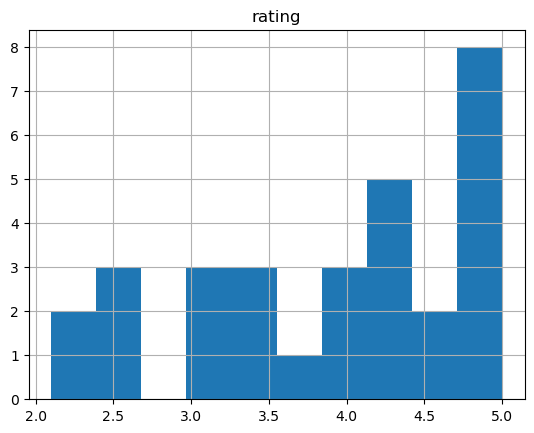

In [2]:
#%% Scraping product review from www.productreview.com.au

# WARNING!!!
# productreview page source is changed often and the script below may need
# to be modified

# Dont forget to check their robots policy first
# https://www.productreview.com.au/robots.txt

#Text file destination to store the output 
logfile='prodreview.txt'

# for each page, we store the product reviews we scrape as 
# a list of dictionary
reviewlist = []
productlist = []

# initialise chromedriver using selenium

# if selenium is version 4.x use the following initialisation
service = Service(executable_path=r'c:\Users\apalangkaraya\chromedriver-win64\chromedriver.exe')
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)

# if selenium is version 3.x Use the following initialisation
# (on Anaconda prompt check which version of selenium you have: conda list selenium)
# options = webdriver.ChromeOptions()
# driver = webdriver.Chrome(executable_path=r'c:\Users\apalangkaraya\chromedriver-win64\chromedriver.exe', options=options)

# for this exercise, we only do the first two search pages
searchpage=range(1,3)

#Pull product reviews in each search result pages for car-accessories

baseurl="https://www.productreview.com.au/c/car-accessories"

    
print("Extracting reviews")

try:
    # if i==1:
    #     url = baseurl + "#search-results"
    # else:
    #     url = baseurl + "?page="+str(i)+"#search-results"

    driver.get(baseurl)

except Exception as err:
    print(f'Other error occurred: {err}')  # Python 3.6
    
else:

    # click load more the specified number of times        
    # for i in searchpage:
    #     # click load more
    #     try:
    #         driver.find_element(By.XPATH,"/html/body/div[1]/div/div/div[1]/div/div[2]/main/div/div[2]/button").click()  
    #     except Exception as err:
    #         print(f'Other error occurred: {err}')  # Python 3.6
            
    # now extract the review
    html = driver.page_source
        
    # parse the html file of the webpage using BeautifulSoup
    soup = BeautifulSoup(html, "html.parser")
    # print(soup)
               
    result = soup.find_all("div", {"data-ctx-namespace":"results"})     
    # print(result)
    for div in result:
        # print(div)
        listing = div.find_all("a", href=lambda x: x and x.startswith('/listings'))
        # print(listing)
        for prod in listing:
            # print(prod.text)
            if prod.text!="":
                productlist.append(prod.text)
                
        ratings = div.find_all("span")
        for rating in ratings: 
            if rating.has_attr("data-count"): 
                # print(rating.text)
                reviewlist.append(rating.text)

        # print(product, review)
        # reviewlist.append({'product':product, 'review':review})

           
# saving the list of dictionary of product review into DataFrame
review_df = pd.DataFrame.from_dict(reviewlist)

review_df = pd.DataFrame({'product':productlist,
                          'review':reviewlist})

# saving to a pickle file (which is a binary file that can be read by Pandas)
review_df.to_pickle('productreview.pkl')
review_df.to_csv('productreview.csv')

# analysing the product review data

# later on, we can open the pkl file using Pandas
myreviewdf = pd.read_pickle('productreview.pkl')

# the review column has the format of [rating + " out of 5 stars"]
# if we want to analyse it, we just want the rating. So we need to strip out
# the " out of 5 stars" part by replacing it with an empty string
# Then we re-cast the string into float for further analysis
myreviewdf['rating']=myreviewdf.review.str.replace(
    ' out of 5 stars','').astype(float)

#histogram of rating
myreviewdf.hist(column=['rating'])

#list of top product
fivestar = myreviewdf[myreviewdf['rating']>4]
print(fivestar)                   
